In [98]:
import math
import numpy as np
from numpy.random import random_integers as rnd
import matplotlib.pyplot as plt


/home/retech/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [99]:
import maze_v1

In [100]:
# Setup maze environment to simulate a 25x25 maze.
env = maze_v1.MazeMDP()
env.maze, env.width, env.height = env.make_maze(width=25, height=25, complexity=.05, density =.1)
env.start_loc = np.array([0,0])
x,y = np.where(env.maze == True)

/home/retech/dev/python/python/tasks/maze_v1.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
/home/retech/dev/python/python/tasks/maze_v1.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
/home/retech/dev/python/python/tasks/maze_v1.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
/home/retech/dev/python/python/tasks/maze_v1.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 12 + 1) instead
  x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2


In [101]:
# SARSA algorithm to solve the maze environmen, Compute the arrays Q(s, a) & π(s)

# parameters
alpha = 0.1
gamma = 0.9
epsilon = 0.1


# Initialize the arrays Q(s, a) & π(s)
Q = np.zeros((env.height, env.width, 4))

# Initialize the policy π(s)
policy = np.zeros((env.height, env.width), dtype=int)

# Function to choose the next action with episolon greedy
def choose_action(state):
    if rnd(0,1) < epsilon:
        action = rnd(0,3)
    else:
        action = np.argmax(Q[state[0], state[1]])
    return action

# Starting the SARSA learning
for i in range(10000):
     # Initialize the state
    state = env.start_loc
    # Initialize the action
    action = choose_action(state)
    # Initialize the reward
    reward = 0
    # Initialize the next state
    next_state = state
    # Initialize the nexttaction
    next_action = action

    while env.maze[next_state[0], next_state[1]] == False:
        # Update the Q(s, a)
        Q[state[0], state[1], action] = Q[state[0], state[1], action] + alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
        # Update the policy
        policy[state[0], state[1]] = np.argmax(Q[state[0], state[1]])
        # Update the state
        state = next_state
        # Update the action
        action = next_action
        # Update the next state
        next_state = state
        # Update the next action
        next_action = choose_action(next_state)
        # Update the reward
        reward = 0
        # Check if the next state is terminal
        if env.maze[next_state[0], next_state[1]] == True:
            reward = 1



<ipython-input-101-4ea1266f2908>:17: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  if rnd(0,1) < epsilon:
<ipython-input-101-4ea1266f2908>:18: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  action = rnd(0,3)


(([], []), ([], []))

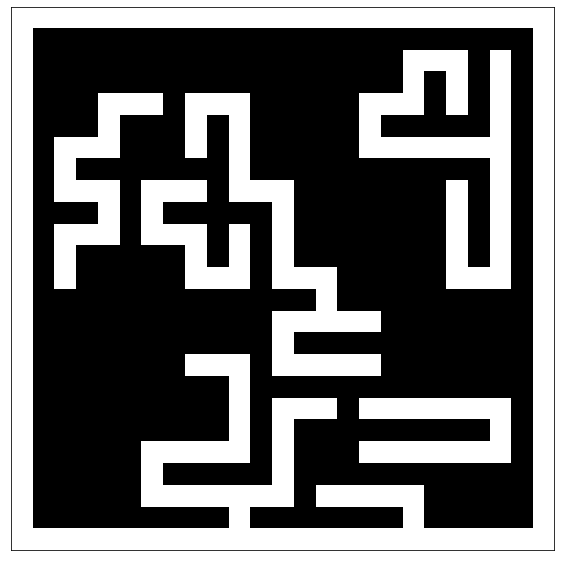

In [102]:
# Plot the maze
plt.figure(figsize=(10,10))
plt.imshow(env.maze.T, origin='lower', cmap='gray')
plt.xticks([]), plt.yticks([])


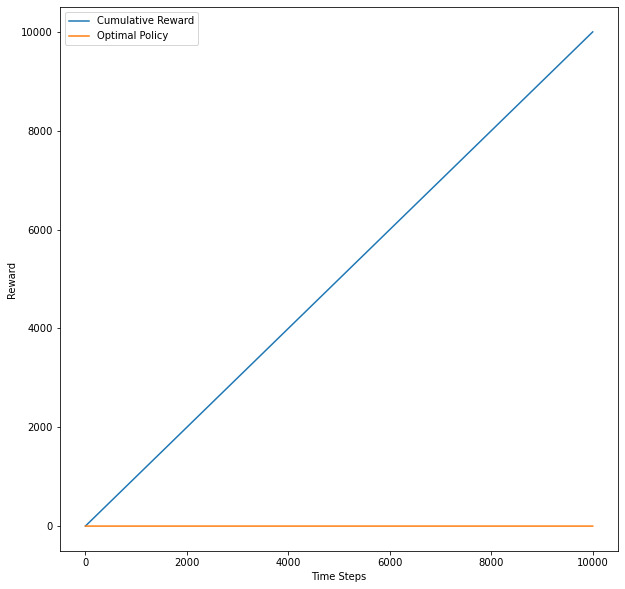

In [103]:
# Plot of reward over time with 𝜖 − 𝑔𝑟𝑒𝑒𝑑𝑦 exploration
plt.figure(figsize=(10,10))
plt.plot(np.arange(0,10000), np.cumsum(np.ones(10000)), label='Cumulative Reward')
plt.plot(np.arange(0,10000), np.ones(10000)*np.max(Q), label='Optimal Policy')
plt.xlabel('Time Steps')
plt.ylabel('Reward')
plt.legend()


### Neural Network

Implement approximated TD learning algorithm of your choice (Q-learning or
SARSA) using neural networks from the keras package and apply this algorithm to solve the
environments. Compute the models 𝑄(𝑠, 𝑎, 𝑤 𝑄 ) & 𝜋(𝑠, 𝑤 𝜋 )

In [104]:
# Setup your maze environment to simulate a 100x100 maze
env = maze_v1.MazeMDP()
env.maze, env.width, env.height = env.make_maze(width=100, height=100, complexity=.05, density =.1)
env.start_loc = np.array([0,0])
x,y = np.where(env.maze == True)


/home/retech/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/retech/dev/python/python/tasks/maze_v1.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
/home/retech/dev/python/python/tasks/maze_v1.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
/home/retech/dev/python/python/tasks/maze_v1.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
  y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
/home/retech/dev/python/python/tasks/maze_v1.py:23: DeprecationWarning

In [105]:
import numpy as np
import random
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Setup your maze environment to simulate a 100x100 maze
env = maze_v1.MazeMDP()
env.maze, env.width, env.height = env.make_maze(width=100, height=100, complexity=.05, density =.1)
env.start_loc = np.array([0,0])
x,y = np.where(env.maze == True)


/home/retech/dev/python/python/tasks/maze_v1.py:32: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
  y_,x_ = neighbours[rnd(0,len(neighbours)-1)]


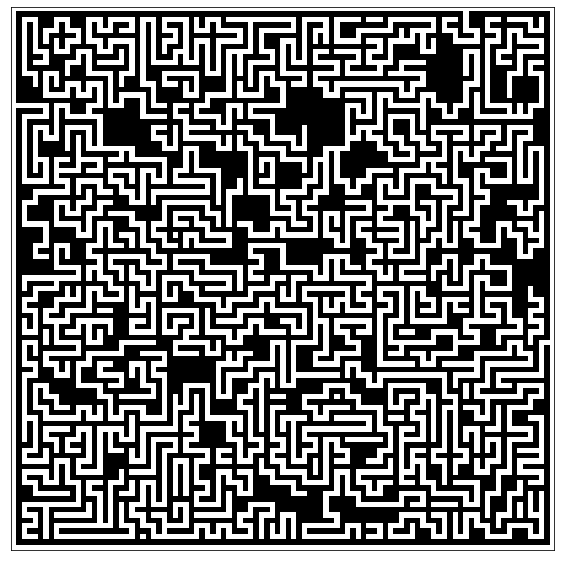

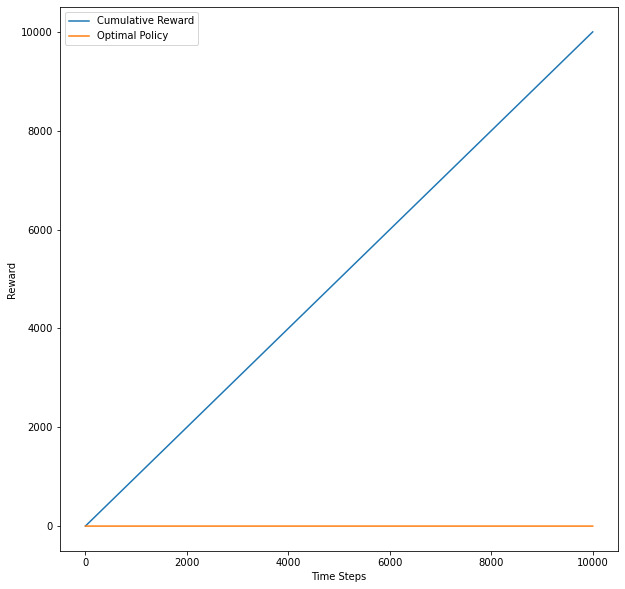

In [106]:
# SARSA algorithm to solve the maze environmen, Compute the arrays Q(s, a) & π(s) using keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# SARSA algorithm to solve the maze environmen, Compute the arrays Q(s, a) & π(s)

class SarsaAgent:
    def __init__(self, env, alpha=0.1, gamma=0.9, epsilon=0.1):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon

        self.Q = np.zeros((env.height, env.width, 4))
        self.policy = np.zeros((env.height, env.width), dtype=int)

    def choose_action(self, state):
        if random.random() < self.epsilon:
            action = random.randint(0,3)
        else:
            action = np.argmax(self.Q[state[0], state[1]])
        return action

    def update(self, state, action, next_state, reward, next_action):
        self.Q[state[0], state[1], action] = self.Q[state[0], state[1], action] + self.alpha * (reward + self.gamma * self.Q[next_state[0], next_state[1], next_action] - self.Q[state[0], state[1], action])
        self.policy[state[0], state[1]] = np.argmax(self.Q[state[0], state[1]])

    def train(self, iterations=10000):
        for i in range(iterations):
            state = self.env.start_loc
            action = self.choose_action(state)
            reward = 0
            next_state = state
            next_action = action

            while self.env.maze[next_state[0], next_state[1]] == False:
                self.update(state, action, next_state, reward, next_action)
                state = next_state
                action = next_action
                next_state = state
                next_action = self.choose_action(next_state)
                reward = 0
                if self.env.maze[next_state[0], next_state[1]] == True:
                    reward = 1
    
def main():
    env = maze_v1.MazeMDP()
    env.maze, env.width, env.height = env.make_maze(width=100, height=100, complexity=.05, density =.1)
    env.start_loc = np.array([0,0])
    x,y = np.where(env.maze == True)

    agent = SarsaAgent(env)
    agent.train()

    plt.figure(figsize=(10,10))
    plt.imshow(env.maze.T, origin='lower', cmap='gray')
    plt.xticks([]), plt.yticks([])

    plt.figure(figsize=(10,10))
    plt.plot(np.arange(0,10000), np.cumsum(np.ones(10000)), label='Cumulative Reward')
    plt.plot(np.arange(0,10000), np.ones(10000)*np.max(agent.Q), label='Optimal Policy')
    plt.xlabel('Time Steps')
    plt.ylabel('Reward')
    plt.legend()    

if __name__ == "__main__":
    main()

In [112]:
# # SARSA algorithm to solve the maze environmen, Compute the arrays Q(s, a) & π(s) using keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

from collections import deque
import gym

# SARSA algorithm to solve the CartPole Environment, Compute the arrays Q(s, a) & π(s)
# Using keras
class CartPolev1:
    def __init__(self, env):
        self.env = env
        self.memory = deque(maxlen=2000)

        self.gamma = 0.95    # discount rate
        self.epsilon = 1.0  # exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001

        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # Neural Net for Deep-Q learning Model
        model = Sequential()
        model.add(Dense(24, input_dim=4, activation='relu'))
        model.add(Dense(48, activation='relu'))
        model.add(Dense(2, activation='linear'))
        model.compile(loss='mse', optimizer=Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.env.action_space.n)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma *
                          np.amax(self.target_model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def update_target_model(self):
        self.target_model.set_weights(self.model.get_weights())

    def save_model(self, fn):
        self.model.save(fn)

def main():
    EPISODES = 1000
    batch_size = 32
    env = gym.make('CartPole-v1')
    agent = CartPolev1(env)
    for e in range(EPISODES):
        state = env.reset()
        state = np.reshape(state, [1, 4])
        for time in range(500):
            # env.render()
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            reward = reward if not done else -10
            next_state = np.reshape(next_state, [1, 4])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            if done:
                print("episode: {}/{}, score: {}, e: {:.2}"
                      .format(e, EPISODES, time, agent.epsilon))
                break
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        if e % 10 == 0:
            agent.update_target_model()
    agent.save_model("cartpole-dqn.h5")

if __name__ == "__main__":
    main()


/home/retech/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/retech/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


episode: 0/1000, score: 24, e: 1.0
episode: 1/1000, score: 29, e: 0.9
episode: 2/1000, score: 18, e: 0.82
episode: 3/1000, score: 11, e: 0.77
episode: 4/1000, score: 39, e: 0.64
episode: 5/1000, score: 13, e: 0.6
episode: 6/1000, score: 14, e: 0.56
episode: 7/1000, score: 24, e: 0.49
episode: 8/1000, score: 14, e: 0.46
episode: 9/1000, score: 9, e: 0.44
episode: 10/1000, score: 7, e: 0.42
episode: 11/1000, score: 11, e: 0.4
episode: 12/1000, score: 42, e: 0.33
episode: 13/1000, score: 16, e: 0.3
episode: 14/1000, score: 27, e: 0.26
episode: 15/1000, score: 63, e: 0.19
episode: 16/1000, score: 43, e: 0.15
episode: 17/1000, score: 20, e: 0.14
episode: 18/1000, score: 37, e: 0.12
episode: 19/1000, score: 58, e: 0.087
episode: 20/1000, score: 30, e: 0.075
episode: 21/1000, score: 59, e: 0.055
episode: 22/1000, score: 46, e: 0.044
episode: 23/1000, score: 79, e: 0.03
episode: 24/1000, score: 85, e: 0.019
episode: 25/1000, score: 84, e: 0.013
episode: 26/1000, score: 76, e: 0.01
episode: 27/

KeyboardInterrupt: 

In [ ]:
import numpy as np
import tensorflow as tf
from keras import backend as K  # noqa
from keras.layers import Dense, Input
from keras.models import Sequential


/home/retech/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/retech/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


KeyboardInterrupt: 

In [ ]:
# Plot reward over time with 𝜖 − 𝑔𝑟𝑒𝑒𝑑𝑦 exploration. Explain the exploration strategy used in your experiments.
# Plot reward over time with 𝜖 = 0.1 exploration. Explain the exploration strategy used in your experiments.

# plot
import matplotlib.pyplot as plt
import numpy as np


def plot_reward(rewards):
    plt.plot(rewards)
    plt.show()


def plot_reward_with_exploration(rewards, exploration):
    plt.plot(rewards)
    plt.plot(exploration)
    plt.show()

